# Challenge Técnico (Core)

**Objetivo**  
Participar en una competencia de Kaggle, realizar un análisis completo del dataset, entrenar y evaluar al menos cinco modelos diferentes, y realizar un benchmark para comparar su rendimiento. El resultado final debe ser subido a GitHub.

---

## **Pasos del Challenge**

### 1. **Registro en Kaggle y Elección de Competencia**
   - Registrarse en Kaggle si no lo has hecho aún.
   - Elegir una competencia activa alineada con los conocimientos y técnicas aprendidas (por ejemplo, clasificación o regresión).

### 2. **Carga y Exploración Inicial de Datos**
   - Descargar el dataset de la competencia.
   - Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
   - Identificar y documentar valores faltantes y outliers.

### 3. **Análisis Exploratorio de Datos (EDA)**
   - Calcular estadísticas descriptivas básicas.
   - Crear visualizaciones para entender la distribución de las variables y sus relaciones.
   - Detectar y tratar valores faltantes y outliers.

### 4. **Preprocesamiento de Datos**
   - Transformar las columnas según sea necesario:
     - Codificación de variables categóricas.
     - Escalado de características numéricas.
   - Dividir el dataset en conjuntos de entrenamiento y prueba.

### 5. **Implementación de Modelos y Benchmark**
   - Entrenar y evaluar al menos cinco modelos diferentes:
     - Regresión Logística
     - K-Nearest Neighbors (KNN)
     - Árbol de Decisión
     - XGBoost
     - LightGBM
   - Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.
   - Optimizar los hiperparámetros utilizando **GridSearchCV** o **RandomizedSearchCV**.
   - Comparar el rendimiento de los modelos utilizando métricas adecuadas.

### 6. **Documentación y Entrega**
   - Documentar todo el proceso en un notebook de Jupyter.
   - Subir el notebook, los resultados y cualquier script adicional a un repositorio de GitHub.
   - Crear un **tag de liberación** (`v1.0.0`) para esta versión del proyecto en GitHub.

---


In [73]:
# Carga de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import calculate_null,val_cat_unicos
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [74]:
# Cargar el dataset de entrenamiento
df_train= pd.read_csv(r'C:\Users\GIGABYTE\Documents\tareas_bootcamp_coding_dojo\mod_2_machine_learning\9_challenge_tecnico\data\train.csv')
df_train.head().T


,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [75]:
df_test = pd.read_csv(r"C:\Users\GIGABYTE\Documents\tareas_bootcamp_coding_dojo\mod_2_machine_learning\9_challenge_tecnico\data\test.csv")
df_test.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47.0,62.0,27.0,22.0
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [76]:
# Exploración inicial
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [78]:
# Identificar valores faltantes
calculate_null(df_train)

,datos sin NAs en q,Na en q,Na en %
Cabin,204,687,77.10
Age,714,177,19.87
Embarked,889,2,0.22
PassengerId,891,0,0.00
Name,891,0,0.00
Pclass,891,0,0.00
Survived,891,0,0.00
Sex,891,0,0.00
Parch,891,0,0.00
SibSp,891,0,0.00


In [79]:
calculate_null(df_test)

,datos sin NAs en q,Na en q,Na en %
Cabin,91,327,78.23
Age,332,86,20.57
Fare,417,1,0.24
Name,418,0,0.00
Pclass,418,0,0.00
PassengerId,418,0,0.00
Sex,418,0,0.00
Parch,418,0,0.00
SibSp,418,0,0.00
Ticket,418,0,0.00


In [80]:
# Identificar duplicados
duplicados = df_train.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados n train: {num_duplicados}")

# Identificar duplicados
duplicados = df_train.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados en test: {num_duplicados}")

Número de registros duplicados n train: 0
Número de registros duplicados en test: 0


In [81]:
val_cat_unicos(df_train)

Valores únicos en la columna 'Name':
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\

In [82]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


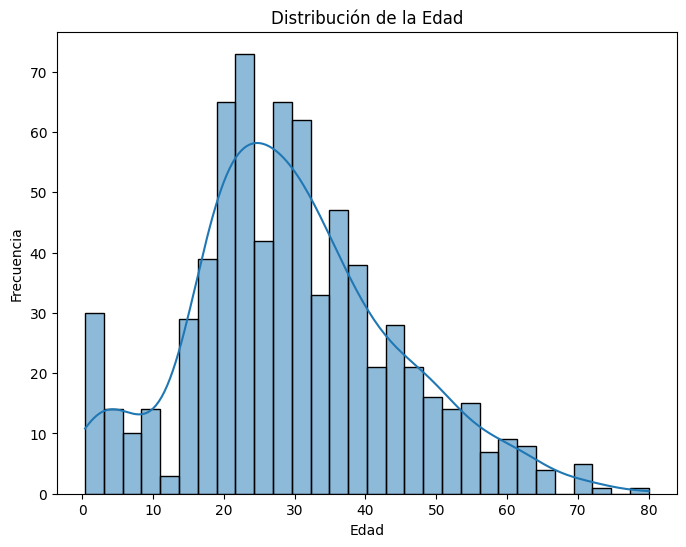

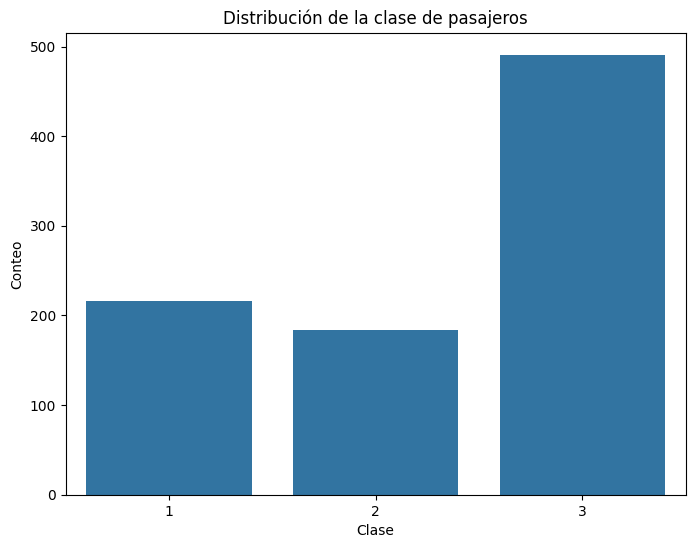

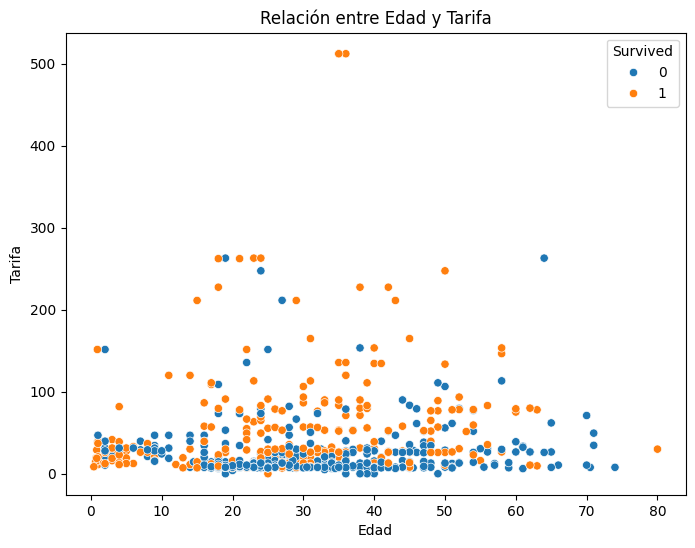

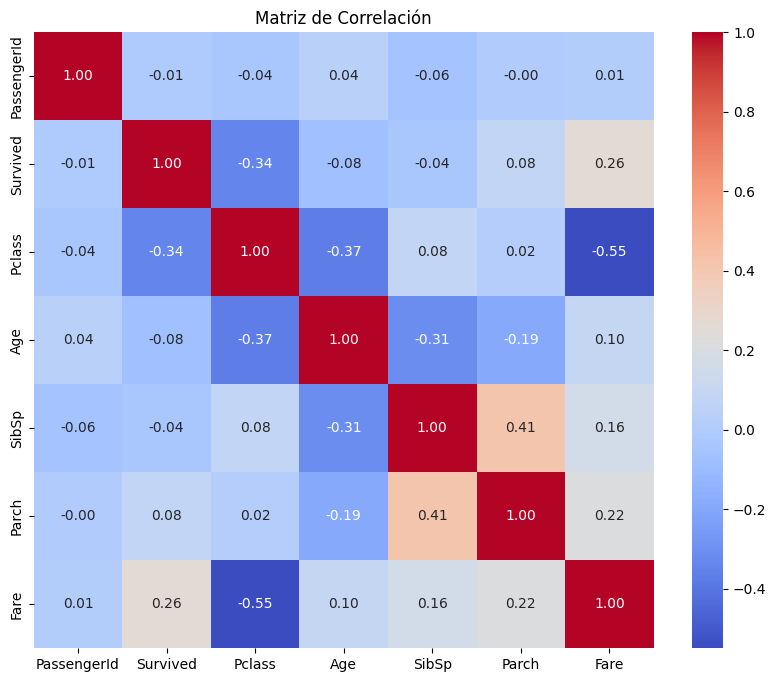

In [83]:
# Distribución de la edad
plt.figure(figsize=(8, 6))
sns.histplot(df_train['Age'].dropna(), kde=True, bins=30)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de la clase de pasajeros (Pclass)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Pclass')
plt.title('Distribución de la clase de pasajeros')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.show()

# Relación entre edad y tarifa (Fare)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='Age', y='Fare', hue='Survived')
plt.title('Relación entre Edad y Tarifa')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()

# Correlación entre las variables numéricas
# Seleccionar solo las columnas numéricas
df_numeric = df_train.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()



In [84]:
# Verificar los valores faltantes
missing_values = df_train.isnull().sum()
print(missing_values)
print()  # Imprime una línea vacía

# Imputar los valores faltantes en Age con la mediana
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

# Imputar los valores faltantes en Embarked con el valor más frecuente
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

# Eliminar la columna 'Cabin' debido a la alta cantidad de valores faltantes
df_train = df_train.drop(columns=['Cabin'])

# Verificar si aún hay valores faltantes
missing_values = df_train.isnull().sum()
print(missing_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  28.0      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                                 ...     ...   ... 

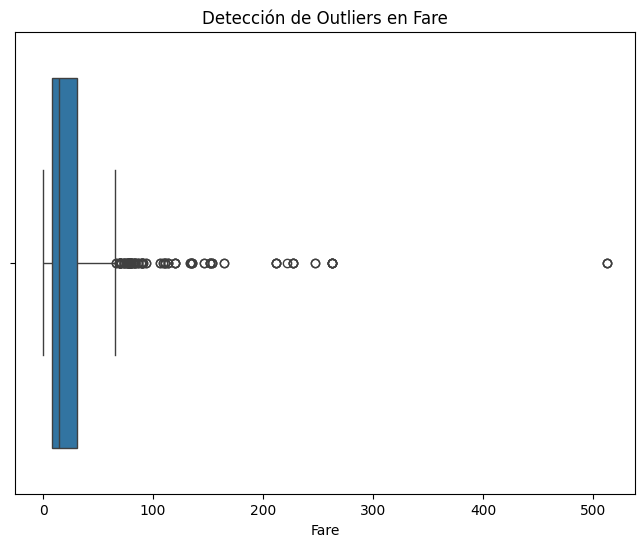

In [85]:
# Detectar outliers en la columna 'Fare'
Q1 = df_train['Fare'].quantile(0.25)
Q3 = df_train['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_train[(df_train['Fare'] < (Q1 - 1.5 * IQR)) | (df_train['Fare'] > (Q3 + 1.5 * IQR))]
print(outliers)

# Visualizar los outliers en la columna 'Fare'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['Fare'])
plt.title('Detección de Outliers en Fare')
plt.show()


In [86]:
# Codificar 'Sex' como 0 (female) y 1 (male)
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})

# Codificar 'Embarked' usando 'get_dummies'
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)


In [87]:
scaler = StandardScaler()
df_train[['Age', 'Fare']] = scaler.fit_transform(df_train[['Age', 'Fare']])


In [88]:
# Definir las características (X) y la variable objetivo (y)
X = df_train.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])
y = df_train['Survived']

# Dividir en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
# Modelo de regresión logística
log_reg = LogisticRegression()
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Puntajes de Regresión Logística: ", log_reg_scores)
print("Promedio de la validación cruzada: ", log_reg_scores.mean())


Puntajes de Regresión Logística:  [0.81818182 0.81118881 0.78873239 0.73943662 0.79577465]
Promedio de la validación cruzada:  0.7906628582684921


In [90]:
# Modelo KNN
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Puntajes de KNN: ", knn_scores)
print("Promedio de la validación cruzada: ", knn_scores.mean())


Puntajes de KNN:  [0.76223776 0.7972028  0.78169014 0.76760563 0.77464789]
Promedio de la validación cruzada:  0.7766768442824781


In [91]:
# Modelo de árbol de decisión
dt = DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X_train, y_train, cv=5)
print("Puntajes de Árbol de Decisión: ", dt_scores)
print("Promedio de la validación cruzada: ", dt_scores.mean())


Puntajes de Árbol de Decisión:  [0.74825175 0.72027972 0.78873239 0.75352113 0.73943662]
Promedio de la validación cruzada:  0.7500443218753079


In [92]:
# Modelo XGBoost
xgb_model = XGBClassifier()
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
print("Puntajes de XGBoost: ", xgb_scores)
print("Promedio de la validación cruzada: ", xgb_scores.mean())


Puntajes de XGBoost:  [0.8041958  0.79020979 0.81690141 0.78873239 0.78873239]
Promedio de la validación cruzada:  0.7977543583177386


In [93]:
# Modelo LightGBM
lgb_model = LGBMClassifier()
lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=5)
print("Puntajes de LightGBM: ", lgb_scores)
print("Promedio de la validación cruzada: ", lgb_scores.mean())


[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [94]:
# Almacenar los resultados
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'XGBoost', 'LightGBM']
scores = [log_reg_scores.mean(), knn_scores.mean(), dt_scores.mean(), xgb_scores.mean(), lgb_scores.mean()]

# Mostrar los resultados
results = pd.DataFrame({'Model': models, 'Cross-Validation Score': scores})
print(results)


                 Model  Cross-Validation Score
0  Logistic Regression                0.790663
1                  KNN                0.776677
2        Decision Tree                0.750044
3              XGBoost                0.797754
4             LightGBM                0.814607


In [95]:
# GridSearchCV para Regresión Logística
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Mejores parámetros para Regresión Logística: ", grid_search.best_params_)


Mejores parámetros para Regresión Logística:  {'C': 0.1, 'penalty': 'l2'}


In [96]:
# Definir los parámetros de búsqueda para cada modelo
param_grid_logreg = {'C': [0.1, 1, 10, 100], 'penalty': ['l2']}
param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
param_grid_tree = {'max_depth': [3, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
param_grid_knn = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
param_grid_lgbm = {'num_leaves': [31, 50, 100], 'learning_rate': [0.05, 0.1, 0.2], 'n_estimators': [20, 50, 100]}

# Crear los modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier()
}

# Parámetros para cada modelo en un diccionario
param_grids = {
    'Logistic Regression': param_grid_logreg,
    'SVM': param_grid_svm,
    'Decision Tree': param_grid_tree,
    'KNN': param_grid_knn,
    'LightGBM': param_grid_lgbm
}
# Realizar GridSearchCV para cada modelo
for model_name, model in models.items():
    print(f"\nBuscando mejores parámetros para {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Mejores parámetros para {model_name}: ", grid_search.best_params_)


Buscando mejores parámetros para Logistic Regression...
Mejores parámetros para Logistic Regression:  {'C': 0.1, 'penalty': 'l2'}

Buscando mejores parámetros para Decision Tree...
Mejores parámetros para Decision Tree:  {'max_depth': 3, 'min_samples_split': 2}

Buscando mejores parámetros para KNN...
Mejores parámetros para KNN:  {'n_neighbors': 3, 'weights': 'uniform'}

Buscando mejores parámetros para LightGBM...
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No furth